# MNIST

Competición de Kaggle. Es una introducción a las redes convolucionales usando en este caso Tensorflow.


In [33]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import os
from sklearn.model_selection import train_test_split

In [34]:
# Comprueba el total de ficheros que hay en la carpeta

for dirname, _, filenames in os.walk('/content/digit-recognizer/'):
  for file in filenames:
    print(os.path.join(dirname, file))

/content/digit-recognizer/test.csv
/content/digit-recognizer/train.csv


In [35]:
# Cargamos los datos para entreno y test
df_train = pd.read_csv('/content/digit-recognizer/train.csv')
df_test = pd.read_csv('/content/digit-recognizer/test.csv')

In [36]:
df_train.shape, df_test.shape

((42000, 785), (28000, 784))

In [37]:
df_train.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,...,pixel744,pixel745,pixel746,pixel747,pixel748,pixel749,pixel750,pixel751,pixel752,pixel753,pixel754,pixel755,pixel756,pixel757,pixel758,pixel759,pixel760,pixel761,pixel762,pixel763,pixel764,pixel765,pixel766,pixel767,pixel768,pixel769,pixel770,pixel771,pixel772,pixel773,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [38]:
df_test.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,pixel39,...,pixel744,pixel745,pixel746,pixel747,pixel748,pixel749,pixel750,pixel751,pixel752,pixel753,pixel754,pixel755,pixel756,pixel757,pixel758,pixel759,pixel760,pixel761,pixel762,pixel763,pixel764,pixel765,pixel766,pixel767,pixel768,pixel769,pixel770,pixel771,pixel772,pixel773,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [39]:
# Separación de los atributos y el target
X = df_train.drop('label', axis=1).copy()
y = df_train['label']


In [40]:
X.shape, y.shape

((42000, 784), (42000,))

In [41]:
# Normalizamos los datos de 0 - 255 a 0 - 1
X = X / 255.0
df_test = df_test / 255.0

In [42]:
# Convertimos los datos a a numpy array

X = X.values
df_test = df_test.values

In [43]:
type(X), type(df_test)

(numpy.ndarray, numpy.ndarray)

In [44]:
type(y)

pandas.core.series.Series

In [45]:
# Pasamos la etiqueta y a numpy array
y = y.to_numpy()

In [46]:
# Vemos los valores máximos de X y df_test una vez hemos normalizado los datos
np.max(X[0]), np.max(df_test[0])

(1.0, 1.0)

In [47]:
# Cambio de la dimensión ya que queremos trabajar en la red neuronal con imágenes 28 x 28 x 1, donde 1 toma la escala de color
# blaco - negro

X = X.reshape(-1, 28, 28, 1)
test = df_test.reshape(-1, 28, 28, 1)

In [48]:
X.shape, test.shape

((42000, 28, 28, 1), (28000, 28, 28, 1))

### Visualización de algunas imágenes



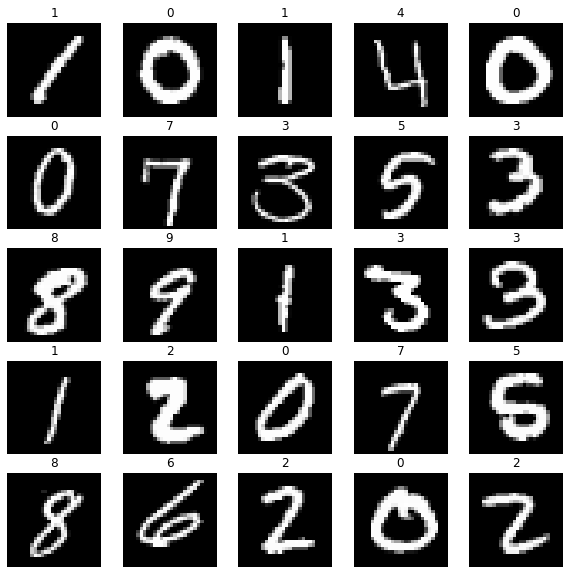

In [49]:
plt.figure(figsize=(10,10))
for i in range(25):
  plt.subplot(5, 5, i+1)
  plt.axis('off')
  plt.grid('false')
  plt.imshow(X[i][:,:,0], cmap='gray')
  plt.title(y[i])

plt.show()


In [50]:
# Separamos los datos para entrenar y para validar
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [51]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((33600, 28, 28, 1), (33600,), (8400, 28, 28, 1), (8400,))

### Construcción de la red neuronal.

En este caso vamos a usar Tensorflow, y construimos una red convolucional.

In [52]:
# Fijamos las capas que tendrá nuestro modelo

model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    tf.keras.layers.MaxPooling2D(3, 3),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(3, 3),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

In [53]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 8, 8, 32)          0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 6, 6, 64)          18496     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 2, 2, 64)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 256)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 64)                16448     
_________________________________________________________________
dense_3 (Dense)              (None, 10)               

In [54]:
# Compilamos el modelo

model.compile(
    optimizer ="adam", 
    loss ="sparse_categorical_crossentropy",
    metrics=['accuracy']
)

In [55]:
X_train.shape, y_train.shape

((33600, 28, 28, 1), (33600,))

In [56]:
tf.random.seed=42
history = model.fit(X_train, y_train, epochs=20, validation_data=(X_test, y_test), verbose=1)

Epoch 1/20
1050/1050 [==============================] - 3s 3ms/step - loss: 0.2957 - accuracy: 0.9129 - val_loss: 0.1356 - val_accuracy: 0.9569
Epoch 2/20
1050/1050 [==============================] - 3s 3ms/step - loss: 0.0824 - accuracy: 0.9741 - val_loss: 0.0687 - val_accuracy: 0.9781
Epoch 3/20
1050/1050 [==============================] - 3s 3ms/step - loss: 0.0579 - accuracy: 0.9825 - val_loss: 0.0510 - val_accuracy: 0.9843
Epoch 4/20
1050/1050 [==============================] - 3s 3ms/step - loss: 0.0452 - accuracy: 0.9862 - val_loss: 0.0473 - val_accuracy: 0.9842
Epoch 5/20
1050/1050 [==============================] - 3s 3ms/step - loss: 0.0364 - accuracy: 0.9881 - val_loss: 0.0452 - val_accuracy: 0.9846
Epoch 6/20
1050/1050 [==============================] - 3s 3ms/step - loss: 0.0302 - accuracy: 0.9906 - val_loss: 0.0384 - val_accuracy: 0.9867
Epoch 7/20
1050/1050 [==============================] - 3s 3ms/step - loss: 0.0265 - accuracy: 0.9920 - val_loss: 0.0602 - val_accuracy:

### Evaluando la precisión y la pérdida del modelo

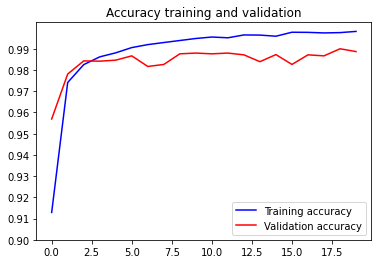

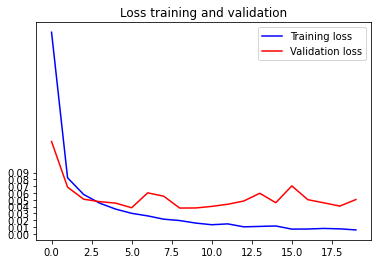

In [57]:
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(accuracy))

plt.plot(epochs, accuracy, 'b', label='Training accuracy')
plt.plot(epochs, val_accuracy, 'r', label='Validation accuracy')
plt.title("Accuracy training and validation")
plt.yticks(np.arange(0.9, 1.0, 0.01))
plt.legend()
plt.show()

plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title("Loss training and validation")
plt.yticks(np.arange(0.0, 0.1, 0.01))
plt.legend()
plt.show()


### Generación del fichero para subir el dataset a Kaggle

In [58]:
predictions = model.predict_classes(test, verbose=0)

predictions

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:455: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


array([2, 0, 9, ..., 3, 9, 2])

In [59]:
dictionary = {
    "ImageId": list(range(1, len(predictions) + 1)),
    "Label": predictions
}

result = pd.DataFrame(dictionary)

In [60]:
result.head()

,ImageId,Label
0,1,2
1,2,0
2,3,9
3,4,9
4,5,3


In [61]:
result.to_csv("result.csv", header=True, index=False)